In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
from cesium import datasets

# Returns
#     dict
#         Dictionary with attributes:
#             - times: list of (4096,) arrays of time values
#             - measurements: list of (4096,) arrays of measurement values
#             - classes: array of class labels for each time series
#             - archive: path to data archive
#             - header: path to header file

eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

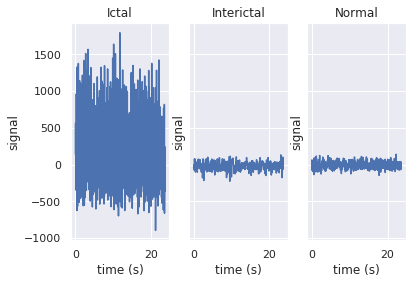

In [2]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names

eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

print(eeg["classes"])

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

In [223]:
print(eeg["classes"])

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

In [3]:
df = pd.DataFrame(eeg)
df = df.drop(columns=['archive', 'header'])
df['id'] = df.index

In [224]:
df.head()

,times,measurements,classes,id
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Normal,0
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Normal,1
2,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....",Normal,2
3,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...",Normal,3
4,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...",Normal,4


In [5]:
df_y = df.drop(columns=['times', 'measurements'])

In [6]:
data_all = []
i = 0

for x in range(4097):
    for index, row in df.iterrows():
            data = [row['times'][x], row['measurements'][x], row['id']]
            data_all.append(data)

In [7]:
df_x = pd.DataFrame(data_all, columns = ['time', 'measurement', 'id']) 
df_x = df_x.sort_values(by=['id', 'time'])
df_x = df_x.reset_index(drop=True)

In [8]:
from tsfresh import extract_features
extracted_features = extract_features(df_x, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 72/72 [32:38<00:00, 11.26s/it]   


In [9]:
extracted_features.head()

variable,measurement__abs_energy,measurement__absolute_sum_of_changes,"measurement__agg_autocorrelation__f_agg_""mean""__maxlag_40","measurement__agg_autocorrelation__f_agg_""median""__maxlag_40","measurement__agg_autocorrelation__f_agg_""var""__maxlag_40","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,measurement__symmetry_looking__r_0.9,measurement__symmetry_looking__r_0.9500000000000001,measurement__time_reversal_asymmetry_statistic__lag_1,measurement__time_reversal_asymmetry_statistic__lag_2,measurement__time_reversal_asymmetry_statistic__lag_3,measurement__value_count__value_-1,measurement__value_count__value_0,measurement__value_count__value_1,measurement__variance,measurement__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,6760553.0,46948.0,0.179654,0.141554,0.041965,34.316112,-0.057866,-0.017027,0.014543,67.319130,...,1.0,1.0,71.116484,727.915465,2081.539966,60.0,29.0,32.0,1633.048953,1.0
1,21030412.0,61118.0,0.125309,0.073677,0.036423,-12.513335,0.068248,0.023024,0.016663,24.896856,...,1.0,1.0,-186.171917,-214.811141,2017.015155,29.0,26.0,16.0,2382.676526,1.0
2,9767461.0,51269.0,0.192327,0.158494,0.051604,44.739505,0.096738,0.032892,0.016754,79.015574,...,1.0,1.0,-171.018315,-1293.518935,-3613.845759,41.0,34.0,36.0,2222.631150,1.0
3,9143449.0,75014.0,0.099767,0.050410,0.029891,42.078797,0.017037,0.005459,0.015860,90.536585,...,1.0,1.0,-60.426129,-246.016614,-416.310193,51.0,40.0,41.0,2215.802969,1.0
4,9590945.0,52873.0,0.241760,0.212578,0.041142,14.055724,0.086515,0.029556,0.016850,45.168675,...,1.0,1.0,149.357753,946.271195,2823.955023,46.0,28.0,33.0,2016.994142,1.0


In [10]:
list(extracted_features)

['measurement__abs_energy',
 'measurement__absolute_sum_of_changes',
 'measurement__agg_autocorrelation__f_agg_"mean"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"median"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_le

In [11]:
# Convert df_y to a numpy array.
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_y['classes'])
list(label_encoder.classes_)

['Ictal', 'Interictal', 'Normal']

In [12]:
df_y['class_numerical'] = label_encoder.transform(df_y['classes'])
df_y = df_y.drop(columns=['classes', 'id'])

In [31]:
# Convert to numpy array.
y = df_y['class_numerical'].values

In [14]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [16]:
features_filtered.head()

variable,measurement__approximate_entropy__m_2__r_0.5,measurement__approximate_entropy__m_2__r_0.7,measurement__friedrich_coefficients__m_3__r_30__coeff_1,measurement__number_peaks__n_10,measurement__approximate_entropy__m_2__r_0.3,measurement__approximate_entropy__m_2__r_0.9,measurement__number_cwt_peaks__n_5,measurement__number_peaks__n_5,measurement__partial_autocorrelation__lag_1,measurement__autocorrelation__lag_1,...,"measurement__fft_coefficient__coeff_5__attr_""abs""","measurement__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","measurement__fft_coefficient__coeff_12__attr_""imag""","measurement__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","measurement__fft_coefficient__coeff_47__attr_""imag""","measurement__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","measurement__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.2","measurement__fft_coefficient__coeff_47__attr_""real""","measurement__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","measurement__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""stderr"""
id,,,,,,,,,,,,,,,,,,,,,
0,0.523761,0.382582,-0.057160,174.0,0.722893,0.277690,362.0,256.0,0.936446,0.936446,...,5623.857993,28.513864,-10546.805498,78.515626,1487.039711,30.388326,80.284636,5321.617912,6.173709,0.054636
1,0.553673,0.412340,-0.080602,167.0,0.766499,0.311291,354.0,268.0,0.922741,0.922741,...,5281.413783,32.610627,-2940.532804,85.590359,-2133.192018,31.712392,89.544105,2669.358549,7.498818,0.105777
2,0.511752,0.359989,-0.061255,173.0,0.704376,0.260934,357.0,264.0,0.942514,0.942514,...,10963.695864,30.960826,25296.105147,92.748560,7217.565168,32.797573,83.538706,-7909.282153,7.210643,0.075148
3,0.700123,0.514806,-0.119917,174.0,1.027837,0.376252,385.0,302.0,0.877892,0.877892,...,4807.064822,38.063031,3937.899749,113.693010,3077.777166,41.398141,109.940644,5684.673151,7.831909,0.111227
4,0.541857,0.389005,-0.064924,173.0,0.796822,0.281272,388.0,262.0,0.932452,0.932452,...,17114.158364,34.498445,4292.663278,89.158590,-978.046746,32.803887,91.334354,774.119626,6.160000,0.082472


In [228]:
list(features_filtered)

['measurement__approximate_entropy__m_2__r_0.5',
 'measurement__approximate_entropy__m_2__r_0.7',
 'measurement__friedrich_coefficients__m_3__r_30__coeff_1',
 'measurement__number_peaks__n_10',
 'measurement__approximate_entropy__m_2__r_0.3',
 'measurement__approximate_entropy__m_2__r_0.9',
 'measurement__number_cwt_peaks__n_5',
 'measurement__number_peaks__n_5',
 'measurement__partial_autocorrelation__lag_1',
 'measurement__autocorrelation__lag_1',
 'measurement__cid_ce__normalize_True',
 'measurement__number_peaks__n_3',
 'measurement__autocorrelation__lag_2',
 'measurement__autocorrelation__lag_3',
 'measurement__partial_autocorrelation__lag_9',
 'measurement__autocorrelation__lag_4',
 'measurement__approximate_entropy__m_2__r_0.1',
 'measurement__autocorrelation__lag_5',
 'measurement__spkt_welch_density__coeff_5',
 'measurement__fft_aggregated__aggtype_"centroid"',
 'measurement__autocorrelation__lag_6',
 'measurement__number_crossing_m__m_-1',
 'measurement__number_crossing_m__m_

In [237]:
# figure out where to split
import pandas
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

X = features_filtered

skf = StratifiedKFold(n_splits=5)

preds_lr_accuracy = []
preds_lr_precision = []
preds_lr_recall = []
preds_lr_f1 = []
preds_lr_matrix = []

preds_nb_accuracy = []
preds_nb_precision = []
preds_nb_recall = []
preds_nb_f1 = []
preds_nb_matrix = []

preds_knn_accuracy = []
preds_knn_precision = []
preds_knn_recall = []
preds_knn_f1 = []
preds_knn_matrix = []

preds_rfc_accuracy = []
preds_rfc_precision = []
preds_rfc_recall = []
preds_rfc_f1 = []
preds_rfc_matrix = []

preds_lr_accuracy_train = []
preds_lr_precision_train = []
preds_lr_recall_train = []
preds_lr_f1_train = []
preds_lr_matrix_train = []

preds_nb_accuracy_train = []
preds_nb_precision_train = []
preds_nb_recall_train = []
preds_nb_f1_train = []
preds_nb_matrix_train = []

preds_knn_accuracy_train = []
preds_knn_precision_train = []
preds_knn_recall_train = []
preds_knn_f1_train = []
preds_knn_matrix_train = []

preds_rfc_accuracy_train = []
preds_rfc_precision_train = []
preds_rfc_recall_train = []
preds_rfc_f1_train = []
preds_rfc_matrix_train = []

preds_nn_accuracy = []
preds_cnn_accuracy = []

X_keras = np.array(eeg["measurements"])
X_keras = np.expand_dims(X_keras, axis=2)

y_keras = df_y['class_numerical'].values
y_keras = to_categorical(y_keras, num_classes=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 3998, 16)          1616      
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 39, 16)            0         
_________________________________________________________________
flatten_157 (Flatten)        (None, 624)               0         
_________________________________________________________________
dense_360 (Dense)            (None, 32)                20000     
_________________________________________________________________
dense_361 (Dense)            (None, 3)                 99        
Total params: 21,715
Trainable params: 21,715
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
400/400 [==============================] - 10s 25ms/step - loss: 9.6726 - acc: 0.3975
Epoch 2/5
400/400 [==================

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X_keras[train_index], X_keras[test_index]
    y_train, y_test = y_keras[train_index], y_keras[test_index]
    
    model_1d_cnn = Sequential([
        Conv1D(filters=16, kernel_size=100, input_shape=(4097,1)),
        MaxPooling1D(pool_size=100),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
        ])

    model_1d_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model_1d_cnn.summary())

    model_1d_cnn.fit(X_train, y_train, batch_size=5, epochs=5)
    
    preds_cnn_accuracy.append(model_1d_cnn.evaluate(X_test, y_test))
    
        # MODEL FROM ARTICLE
#     model_1d_cnn = Sequential([
#     Conv1D(100, 10, activation='relu', input_shape=(None,1)),
#     Conv1D(filters=32, kernel_size=5, activation='relu'),
#     MaxPooling1D(3),
#     Conv1D(160, 10, activation='relu'),
#     Conv1D(160, 10, activation='relu'),
#     GlobalAveragePooling1D(),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
#     ])
    
    # MODEL FROM ARTICLE MODEL
#     model_m = Sequential()
#     model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
#     model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
#     model_m.add(Conv1D(100, 10, activation='relu'))
#     model_m.add(MaxPooling1D(3))
#     model_m.add(Conv1D(160, 10, activation='relu'))
#     model_m.add(Conv1D(160, 10, activation='relu'))
#     model_m.add(GlobalAveragePooling1D())
#     model_m.add(Dropout(0.5))
#     model_m.add(Dense(num_classes, activation='softmax'))
#     print(model_m.summary())
    
#     model_1d_cnn.fit(X_train, y_train, epochs=EPOCHS)

In [238]:
preds_cnn_accuracy

[[9.670857276916509, 0.4],
 [9.670857238769532, 0.4],
 [9.670857276916509, 0.4],
 [8.703771667480469, 0.46],
 [9.670857276916509, 0.4]]

In [ ]:
X = X.values

In [231]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ###### TRAIN ######
    preds_lr_train = model_lr.predict(X_train)
    preds_nb_train = model_nb.predict(X_train)
    preds_knn_train = model_knn.predict(X_train)
    preds_rfc_train = model_rfc.predict(X_train)
    
    preds_lr_accuracy_train.append(accuracy_score(y_train, preds_lr_train))
    preds_lr_precision_train.append(precision_score(y_train, preds_lr_train, average='weighted'))
    preds_lr_recall_train.append(recall_score(y_train, preds_lr_train, average='weighted'))
    preds_lr_f1_train.append(f1_score(y_train, preds_lr_train, average='weighted'))
    preds_lr_matrix_train.append(confusion_matrix(y_train, preds_lr_train))
    
    preds_nb_accuracy_train.append(accuracy_score(y_train, preds_nb_train))
    preds_nb_precision_train.append(precision_score(y_train, preds_nb_train, average='weighted'))
    preds_nb_recall_train.append(recall_score(y_train, preds_nb_train, average='weighted'))
    preds_nb_f1_train.append(f1_score(y_train, preds_nb_train, average='weighted'))
    preds_nb_matrix_train.append(confusion_matrix(y_train, preds_nb_train))
    
    preds_knn_accuracy_train.append(accuracy_score(y_train, preds_knn_train))
    preds_knn_precision_train.append(precision_score(y_train, preds_knn_train, average='weighted'))
    preds_knn_recall_train.append(recall_score(y_train, preds_knn_train, average='weighted'))
    preds_knn_f1_train.append(f1_score(y_train, preds_knn_train, average='weighted'))
    preds_knn_matrix_train.append(confusion_matrix(y_train, preds_knn_train))
    
    preds_rfc_accuracy_train.append(accuracy_score(y_train, preds_rfc_train))
    preds_rfc_precision_train.append(precision_score(y_train, preds_rfc_train, average='weighted'))
    preds_rfc_recall_train.append(recall_score(y_train, preds_rfc_train, average='weighted'))
    preds_rfc_f1_train.append(f1_score(y_train, preds_rfc_train, average='weighted'))
    preds_rfc_matrix_train.append(confusion_matrix(y_train, preds_rfc_train))
    
    ###### TEST ######
    preds_lr = model_lr.predict(X_test)
    preds_nb = model_nb.predict(X_test)
    preds_knn = model_knn.predict(X_test)
    preds_rfc = model_rfc.predict(X_test)
    
    preds_lr_accuracy.append(accuracy_score(y_test, preds_lr))
    preds_lr_precision.append(precision_score(y_test, preds_lr, average='weighted'))
    preds_lr_recall.append(recall_score(y_test, preds_lr, average='weighted'))
    preds_lr_f1.append(f1_score(y_test, preds_lr, average='weighted'))
    preds_lr_matrix.append(confusion_matrix(y_test, preds_lr))
    
    preds_nb_accuracy.append(accuracy_score(y_test, preds_nb))
    preds_nb_precision.append(precision_score(y_test, preds_nb, average='weighted'))
    preds_nb_recall.append(recall_score(y_test, preds_nb, average='weighted'))
    preds_nb_f1.append(f1_score(y_test, preds_nb, average='weighted'))
    preds_nb_matrix.append(confusion_matrix(y_test, preds_nb))
    
    preds_knn_accuracy.append(accuracy_score(y_test, preds_knn))
    preds_knn_precision.append(precision_score(y_test, preds_knn, average='weighted'))
    preds_knn_recall.append(recall_score(y_test, preds_knn, average='weighted'))
    preds_knn_f1.append(f1_score(y_test, preds_knn, average='weighted'))
    preds_knn_matrix.append(confusion_matrix(y_test, preds_knn))
    
    preds_rfc_accuracy.append(accuracy_score(y_test, preds_rfc))
    preds_rfc_precision.append(precision_score(y_test, preds_rfc, average='weighted'))
    preds_rfc_recall.append(recall_score(y_test, preds_rfc, average='weighted'))
    preds_rfc_f1.append(f1_score(y_test, preds_rfc, average='weighted'))
    preds_rfc_matrix.append(confusion_matrix(y_test, preds_rfc))
    
    model_lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
    model_nb = GaussianNB().fit(X_train, y_train) 
    model_knn = KNeighborsClassifier(3).fit(X_train, y_train)
    model_rfc = RandomForestClassifier(n_estimators=128, max_features="auto", random_state=0).fit(X_train, y_train)
    
    ###### Keras NN ######
    X_train_keras_nn = np.expand_dims(X_train, axis=1) # should turn (400,368) to (400,1,368)
    X_test_keras_nn = np.expand_dims(X_test, axis=1)
    
    y_train_keras_nn = pandas.get_dummies(y_train)
    y_train_keras_nn = y_train_keras_nn.values
    y_test_keras_nn = pandas.get_dummies(y_test)
    y_test_keras_nn = y_test_keras_nn.values
    
    model_nn = Sequential([
        Dense(8, activation='relu', input_shape=(1, 328)),
        Dense(10, activation = 'relu'),
        Dense(10, activation = 'relu'),
        Dense(10, activation = 'relu'),
        Dense(3, activation='softmax'),
        Flatten()
    ])
    
    model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model_nn.summary())
    
    model_nn.fit(X_train_keras_nn, y_train_keras_nn, epochs=15, batch_size=5)
    preds_nn_accuracy.append(model_nn.evaluate(X_test_keras_nn, y_test_keras_nn))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_329 (Dense)            (None, 1, 8)              2632      
_________________________________________________________________
dense_330 (Dense)            (None, 1, 10)             90        
_________________________________________________________________
dense_331 (Dense)            (None, 1, 10)             110       
_________________________________________________________________
dense_332 (Dense)            (None, 1, 10)             110       
_________________________________________________________________
dense_333 (Dense)            (None, 1, 3)              33        
_________________________________________________________________
flatten_148 (Flatten)        (None, 3)                 0         
Total params: 2,975
Trainable params: 2,975
Non-trainable params: 0
_________________________________________________________________
None
Epo

100/100 [==============================] - 4s 38ms/step


In [177]:
def get_ave(array):
        return sum(array) / len(array) 

In [74]:
def get_nn_ave(array):
    acc = [i[1] for i in array]
    ave = sum(acc) / float(len(acc))
    return ave

In [117]:
def get_matrix_ave(array):
    new_sum = 0
    
    for i in range(len(array)):
        new_sum = np.array(array[i]) + new_sum
        
    return new_sum / len(array)

In [129]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def pretty_matrix(array):
    ax = plt.subplot()
    df_cm = pd.DataFrame(array, range(len(get_matrix_ave(array))), range(len(get_matrix_ave(array))))
    #plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, ax = ax)# font size
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

Logistic Regression:

Average Train Accuracy: 0.8450
Average Test Accuracy: 0.7633

Average Train Precision: 0.8555
Average Test Precision: 0.7960

Average Train Sensitivity: 0.8450
Average Test Sensitivity: 0.7633

Average Train F1 Score: 0.8446
Average Test F1 Score: 0.7478


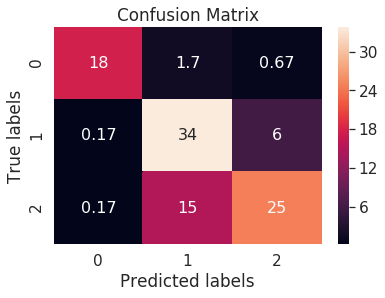

In [185]:
print("Logistic Regression:\n")
print("Average Train Accuracy: %.4f" % get_ave(preds_lr_accuracy_train))
print("Average Test Accuracy: %.4f\n" % get_ave(preds_lr_accuracy))

print("Average Train Precision: %.4f" % get_ave(preds_lr_precision_train))
print("Average Test Precision: %.4f\n" % get_ave(preds_lr_precision))

print("Average Train Sensitivity: %.4f" % get_ave(preds_lr_recall_train))
print("Average Test Sensitivity: %.4f\n" % get_ave(preds_lr_recall))

print("Average Train F1 Score: %.4f" % get_ave(preds_lr_f1_train))
print("Average Test F1 Score: %.4f" % get_ave(preds_lr_f1))
pretty_matrix(get_matrix_ave(preds_lr_matrix))

Naive Bayes:

Average Train Accuracy: 0.6810
Average Test Accuracy: 0.6783

Average Train Precision: 0.7222
Average Test Precision: 0.7243

Average Train Sensitivity: 0.6810
Average Test Sensitivity: 0.6783

Average Train F1 Score: 0.6489
Average Test F1 Score: 0.6441


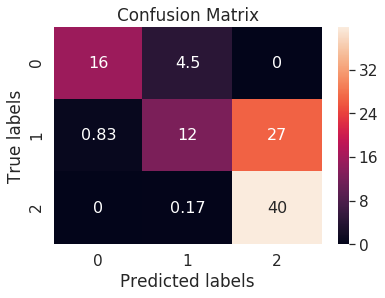

In [192]:
print("Naive Bayes:\n")
print("Average Train Accuracy: %.4f" % get_ave(preds_nb_accuracy_train))
print("Average Test Accuracy: %.4f\n" % get_ave(preds_nb_accuracy))

print("Average Train Precision: %.4f" % get_ave(preds_nb_precision_train))
print("Average Test Precision: %.4f\n" % get_ave(preds_nb_precision))

print("Average Train Sensitivity: %.4f" % get_ave(preds_nb_recall_train))
print("Average Test Sensitivity: %.4f\n" % get_ave(preds_nb_recall))

print("Average Train F1 Score: %.4f" % get_ave(preds_nb_f1_train))
print("Average Test F1 Score: %.4f" % get_ave(preds_nb_f1))
pretty_matrix(get_matrix_ave(preds_nb_matrix))

K-Nearest Neighbors:

Average Train Accuracy: 0.8465
Average Test Accuracy: 0.6383

Average Train Precision: 0.8466
Average Test Precision: 0.6392

Average Train Sensitivity: 0.8465
Average Test Sensitivity: 0.6383

Average Train F1 Score: 0.8456
Average Test F1 Score: 0.6379


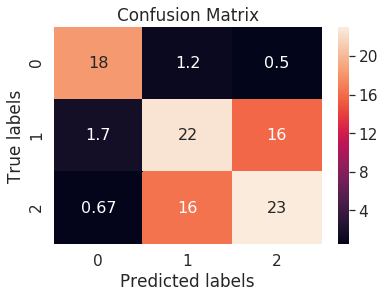

In [190]:
print("K-Nearest Neighbors:\n")
print("Average Train Accuracy: %.4f" % get_ave(preds_knn_accuracy_train))
print("Average Test Accuracy: %.4f\n" % get_ave(preds_knn_accuracy))

print("Average Train Precision: %.4f" % get_ave(preds_knn_precision_train))
print("Average Test Precision: %.4f\n" % get_ave(preds_knn_precision))

print("Average Train Sensitivity: %.4f" % get_ave(preds_knn_recall_train))
print("Average Test Sensitivity: %.4f\n" % get_ave(preds_knn_recall))

print("Average Train F1 Score: %.4f" % get_ave(preds_knn_f1_train))
print("Average Test F1 Score: %.4f" % get_ave(preds_knn_f1))
pretty_matrix(get_matrix_ave(preds_knn_matrix))

Random Forest Classifier:

Average Train Accuracy: 1.0000
Average Test Accuracy: 0.9417

Average Train Precision: 1.0000
Average Test Precision: 0.9472

Average Train Sensitivity: 1.0000
Average Test Sensitivity: 0.9417

Average Train F1 Score: 1.0000
Average Test F1 Score: 0.9416


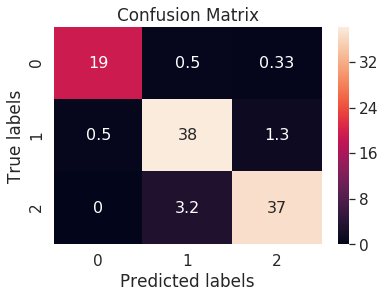

In [191]:
print("Random Forest Classifier:\n")
print("Average Train Accuracy: %.4f" % get_ave(preds_rfc_accuracy_train))
print("Average Test Accuracy: %.4f\n" % get_ave(preds_rfc_accuracy))

print("Average Train Precision: %.4f" % get_ave(preds_rfc_precision_train))
print("Average Test Precision: %.4f\n" % get_ave(preds_rfc_precision))

print("Average Train Sensitivity: %.4f" % get_ave(preds_rfc_recall_train))
print("Average Test Sensitivity: %.4f\n" % get_ave(preds_rfc_recall))

print("Average Train F1 Score: %.4f" % get_ave(preds_rfc_f1_train))
print("Average Test F1 Score: %.4f" % get_ave(preds_rfc_f1))
pretty_matrix(get_matrix_ave(preds_rfc_matrix))

In [140]:
print("Neural Network:\n")
print("Average Accuracy: %.4f" % get_nn_ave(preds_nn_accuracy))


Neural Network:
Average Accuracy: 0.2970
